# Statistical Learning HW1: K-nearest-neighbors (KNN) model

# Part1 [myknn_regressor]
### We are going to construct own KNN regressor and use the "brute-force" method to find nearest neighbors.

In [1]:
import pickle
import numpy as np

## Q1.1 Create myknn_regressor
### ● init with 
    1. "k" as the hyper-parameter for the number of neighbors
    2. "real-valued function", which might be "equal_weight" or "remove_outliers".

In [2]:
# construct myknn_regressor
class myknn_regressor:

    def __init__(self, k, real_valued_fn):
        self.k = k
        self.real_valued_fn = real_valued_fn
        
    def fit(self, X, Y):
        self.Y_train = Y
        self.X_train_stand = self.__standardize(X)
        
    def predict(self, X_test):
        X_test_stand = self.__standardize(X_test)
        
        distance_arr = []
        for test_x in X_test_stand:
            distances = []
            for train_x in self.X_train_stand:
                dis = self.__eudis(train_x, test_x)
                distances.append(dis)
            distance_arr.append(distances)

        list_y = []
        for dis in distance_arr:
            sorted_index = [index for index, num in sorted(enumerate(dis), key=lambda x: x[-1])]
            min_distances_index = sorted_index[:self.k]
            ys = []
            for i in min_distances_index:
                y = self.Y_train[i]
                ys.append(y)
                distance = dis[i]
            list_y.append(ys)

        predicted_values = []
        for each_list in list_y:
            
            if self.k < 10:
                predicted_value = self.__take_average(each_list)
                predicted_values.append(predicted_value)
            else:
                if self.real_valued_fn == "remove_outliers":
                    li = self.__remove_outliers(each_list)
                    predicted_value = self.__take_average(li)
                    predicted_values.append(predicted_value)
                else:
                    predicted_value = self.__take_average(each_list)
                    predicted_values.append(predicted_value)
        
        np_predicted_values = np.array(predicted_values)
        return np_predicted_values

    def __standardize(self, matrix):
        X = (matrix - np.mean(matrix, axis=0)) / np.std(matrix, axis=0)
        return X

    def __eudis(self, v1, v2):
        return np.linalg.norm(v1-v2)

    def __remove_outliers(self, ys):
        final_ys = []
        q1, q3= np.percentile(ys, [25,75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)
        for i in range(len(ys)):
            if lower_bound <= ys[i] <= upper_bound:
                final_ys.append(ys[i])
        return final_ys

    def __take_average(self, arr):
        return sum(arr)/len(arr)

In [3]:
# Function for calculating RMSE
def RMSE(predictions, answers):
    diff_sum = 0
    for i in range(len(answers)):
        diff = (predictions[i] - answers[i])**2
        diff_sum += diff
    rmse = np.sqrt(diff_sum/(len(answers)))
    np_rmse = np.array(rmse)
    return np_rmse

### Load data from msd_data1.pickle

In [4]:
df = open('msd_data1.pickle','rb')
data = pickle.load(df)
df.close()

### Quick review of data

In [5]:
data

{'X_train': array([[  53.39967,   56.67781,   55.63508, ...,    1.3159 ,    2.37448,
            1.85999],
        [  42.83464,  -33.90478,   38.97704, ...,    9.72827, -175.51446,
          -15.8389 ],
        [  49.88591,   23.30563,   54.79012, ...,    1.94152,  101.27241,
            8.99355],
        ...,
        [  41.04397,  -96.30727,   56.8073 , ...,    3.60251,  -97.24809,
           -5.80797],
        [  42.8676 ,   43.36365,   29.17957, ...,   18.71014,  208.9029 ,
          -11.08426],
        [  36.57558,   29.8733 ,   -3.08101, ...,   21.0417 ,  106.60317,
            3.44396]]),
 'Y_train': array([1996., 2001., 2003., ..., 2009., 1982., 1981.]),
 'X_test': array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
            9.47857],
        [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
            5.39116],
        [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
           -4.97266],
        ...,
        [  39.81814

In [6]:
X_train = data['X_train']
Y_train = data['Y_train']
X_test = data['X_test']
Y_test = data['Y_test']

## Q1.2

###  Make predictions using  k=20 and "equal_weight"

In [7]:
myknn_equ = myknn_regressor(20, "equal_weight")
myknn_equ.fit(X_train, Y_train)
ypred_equ = myknn_equ.predict(X_test)

### Calculate RMSE

In [8]:
rmse_equ = RMSE(ypred_equ, Y_test)

### List the RMSE and the first 20 predictions in the testing data

In [9]:
print("RMSE:", rmse_equ)
print("First 20 predictions:")
ypred_equ[:20]

RMSE: 10.292158827638321
First 20 predictions:


array([1992.9 , 1994.05, 2000.05, 1991.5 , 1992.8 , 1998.5 , 1987.1 ,
       1990.9 , 2001.8 , 2003.  , 2001.15, 1998.65, 1995.55, 1997.2 ,
       1995.05, 1997.35, 1992.15, 1999.1 , 2003.6 , 1995.75])

## Q1.3

### Make predictions using k=20 and "remove_outliers"

In [10]:
myknn_out = myknn_regressor(20, "remove_outliers")
myknn_out.fit(X_train, Y_train)
ypred_out = myknn_out.predict(X_test)

### Calculate RMSE

In [11]:
rmse_out = RMSE(ypred_out, Y_test)

### List the RMSE and the first 20 predictions in the testing data

In [12]:
print("RMSE:", rmse_out)
print("First 20 predictions:")
ypred_out[:20]

RMSE: 10.225720983625134
First 20 predictions:


array([1992.9       , 1994.05      , 2000.05      , 1992.73684211,
       1992.8       , 2000.        , 1987.1       , 1990.9       ,
       2001.8       , 2003.94736842, 2001.15      , 2000.94444444,
       1995.55      , 1997.2       , 1998.61111111, 1997.35      ,
       1992.15      , 2004.23529412, 2003.6       , 1995.75      ])

## Part1 observations:
#### 1. 在 k = 20 的情形下，使用 "remove_outliers" 計算預測值相較於 "equal_weight" 有較大的 RMSE，顯示去除 outliers 可能有助於提高準確率。
#### 2. 然而兩者的 RMSE 並未差異很大，顯示或許資料特徵能夠相對反應出 Y 值，沒有太多的離群值產生，因此兩者預測結果差異不大，誤差自然也相去不遠。

# -----

# Part2 [Tuning the Hyper-parameter]
### We are going to observe prediciton outcomes under different k values and feature standerdizations.

In [13]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import matplotlib.pyplot as plt

### Set up k_set and useful functions

In [14]:
k_set = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

In [15]:
# using sklearn module
def knn_regressor_predict(k, X_train, Y_train, X_test):
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, Y_train)
    ypreds = knn.predict(X_test)
    return ypreds

In [34]:
# own knn class
def myknn_regressor_predict(k, X_train, Y_train, X_test):
    myknn = myknn_regressor(20, "remove_outliers")
    myknn.fit(X_train, Y_train)
    ypreds = myknn.predict(X_test)
    return ypreds

## Case1: sklearn KNN model with all feature values standardized under different k values

In [17]:
# standardize data
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

predictions_scaled = []
for k in k_set:
    predictions = knn_regressor_predict(k, X_train_scaled, Y_train, X_test_scaled)
    predictions_scaled.append(predictions)

### Calculate RMSE for each k value

In [18]:
rmses_scaled = []
for i in range(len(k_set)):
    rmse_scaled = RMSE(predictions_scaled[i], Y_test)
    rmses_scaled.append(rmse_scaled)
    print(k_set[i], rmse_scaled)

1 13.94019368588543
2 12.097861381252473
3 11.448255568231989
4 11.043653909221652
5 10.900440969673362
10 10.46269085847422
15 10.35945758625814
20 10.292158827638321
25 10.261870966511575
30 10.25780403905746
35 10.235202506063878
40 10.209997388181183
45 10.204546360311829
50 10.228160003962913
55 10.232596529500082
60 10.242063661955802
80 10.245796391589913
100 10.260879617914501
120 10.284962306823397
140 10.299767106540788
160 10.318954408812258
180 10.34784164042078
200 10.370087243686369


### The relations between  k(x-axis) and RMSE(y-axis)

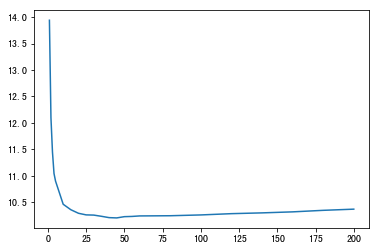

In [19]:
plt.plot(k_set, rmses_scaled)
plt.show()

## Case2: sklearn KNN model without feature scaling under different k values

In [20]:
predictions_non_scaled = []
for k in k_set:
    predictions = knn_regressor_predict(k, X_train, Y_train, X_test)
    predictions_non_scaled.append(predictions)

In [21]:
rmses_non_scaled = []
for i in range(len(k_set)):
    rmse_non_scaled = RMSE(predictions_non_scaled[i], Y_test)
    rmses_non_scaled.append(rmse_non_scaled)
    print(k_set[i], rmse_non_scaled)

1 14.923638966418345
2 12.777499755429464
3 12.075674967716077
4 11.767805657810635
5 11.466392632384453
10 11.077460900404935
15 10.88897913794797
20 10.797788546734951
25 10.790073017979692
30 10.750265612567011
35 10.717738719772298
40 10.714437504678774
45 10.698494013475859
50 10.69110105960404
55 10.68260873412441
60 10.672535729098705
80 10.662907517124506
100 10.677019504524656
120 10.68313963899639
140 10.687017556442067
160 10.691630026202139
180 10.69071978380711
200 10.69885337470018


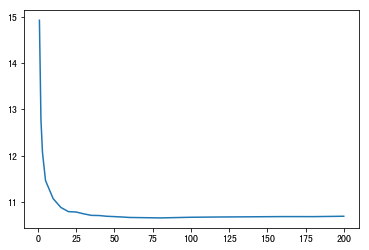

In [22]:
plt.plot(k_set, rmses_non_scaled)
plt.show()

## Case3: use standardized features and adopted myknn_regressor with "remove_outlier"

In [47]:
predictions_myknn = []
for k in k_set:
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(X_train, Y_train)
    ypred = myknn.predict(X_test)
    predictions_myknn.append(ypred)

In [48]:
rmses_myknn = []
for i in range(len(k_set)):
    rmse_myknn = RMSE(predictions_myknn[i], Y_test)
    rmses_myknn.append(rmse_myknn)
    print(k_set[i], rmse_myknn)

1 13.94019368588543
2 12.097861381252473
3 11.448255568231989
4 11.043653909221652
5 10.900440969673362
10 10.514337993290836
15 10.343823629898093
20 10.225720983625134
25 10.213345451143013
30 10.1880791936093
35 10.161597862384475
40 10.095243787687686
45 10.056682304105303
50 10.089018275220822
55 10.076818047624421
60 10.089731397690315
80 10.067742577227312
100 10.063088284816114
120 10.088531815151669
140 10.105973734512313
160 10.10905585091357
180 10.143134931440638
200 10.170153335037122


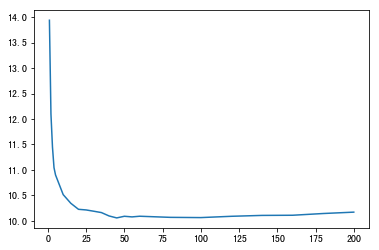

In [49]:
plt.plot(k_set, rmses_myknn)
plt.show()

## Compare three cases 

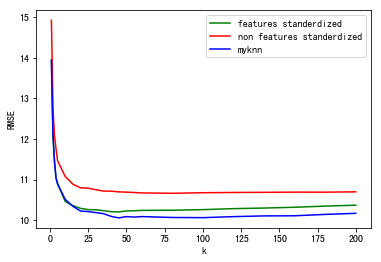

In [50]:
plt.plot(k_set, rmses_scaled, color='green', label='features standerdized')
plt.plot(k_set, rmses_non_scaled, color='red', label='non features standerdized')
plt.plot(k_set, rmses_myknn, color='blue', label='myknn')
plt.legend()

plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

## Part2 observations:
#### 1. 可以明顯看出不論是否有標準化特徵值，誤差皆在大約 k = 1 到 k = 20 之間快速下降，而後 RMSE 即趨緩。
#### 2. 不論 k 為何，特徵標準化後數據的 RMSE 明顯小於未標準化的數據。
#### 3. 特徵標準化的情況下，使用 myknn_regressor 在 k 值相對較大時，有較低的誤差，假設 sklearn 模組在計算預測平均沒有剔除 outliers，則可反應當 k 太大時可能會抓到和自己不太相似的鄰居，進而導致誤差提升。
#### 4. 由此可知，在選取 k 時不建議選取過小的值，而以此例子來說， k 值選在 40 上下預測出來的結果誤差最小。
#### 5. 使用 sklearn 模組的運算速度相較於 myknn_regressor 速度快上許多，顯示在優化效率上還有很大的空間。